In [262]:
import numpy as np
from openqaoa.problems import BinPacking, MaximumCut, TSP, ShortestPath
from openqaoa.utilities import plot_graph
import json
import pprint
import networkx as nx

In [263]:
desiredProblemType = 'ShortestPath' #options: 'BinPacking', 'MaxCut', 'TSP', 'ShortestPath'

In [264]:
if desiredProblemType == 'ShortestPath': #doesnt seem possible to get a non-trivial example of this problem in less than 12 qubits
    n_items = 2 # number of items
    n_bins = 2 # maximum number of bins the solution will be explored on
    min_weight = 1 # minimum weight of the items
    max_weight = 3 # maximum weight of the items
    weight_capacity = 5 # weight capacity of the bins
    weights = np.random.default_rng(seed=1234).integers(low=min_weight, high=max_weight, size=n_items) # random instance of the problem

    bpp = BinPacking(weights, weight_capacity, n_bins=n_bins, simplifications=False) #it is here that you would specifiy the penalty for the bin packing problem
    quboProb = bpp.qubo

elif desiredProblemType == 'MaxCut':
    G = nx.generators.fast_gnp_random_graph(n=10, p=0.6) #you can fix the seed for the graphs here
    maxcut_prob = MaximumCut(G)
    quboProb = maxcut_prob.qubo

elif desiredProblemType == 'TSP':
    G = nx.generators.fast_gnp_random_graph(n=4, p=0.6)
    nx.set_edge_attributes(G, values = 1, name = 'weight')
    tsp_prob = TSP(G=G, A=10, B=1)
    quboProb = tsp_prob.qubo   

elif desiredProblemType == 'ShortestPath': #not sure that the exact solver is working right for this one
    G = nx.generators.fast_gnp_random_graph(n=6, p=0.6)
    nx.set_edge_attributes(G, values = 1, name = 'weight')
    nx.set_node_attributes(G, values = 1, name = 'weight')
    sp_prob = ShortestPath(G, source=0, dest=5)
    quboProb = sp_prob.qubo

quboProb.hamiltonian.expression

-- cannot find parameters matching version: , using: 22.1.1.0
-- cannot find parameters matching version: , using: 22.1.1.0


-12.0Z_{10} - 12.0Z_{11} - 12.0Z_{2} - 12.0Z_{3} - 12.0Z_{4} - 12.0Z_{5} - 12.0Z_{7} - 12.0Z_{8} - 15.0Z_{0}Z_{2} - 15.0Z_{0}Z_{4} - 15.0Z_{0}Z_{7} - 15.0Z_{0}Z_{8} - 15.0Z_{1}Z_{10} - 15.0Z_{1}Z_{11} - 15.0Z_{1}Z_{3} - 15.0Z_{1}Z_{5} - 6.0Z_{6} - 6.0Z_{9} - 7.5Z_{0}Z_{6} - 7.5Z_{1}Z_{9} + 1.5Z_{2}Z_{3} + 1.5Z_{4}Z_{5} + 29.5Z_{0} + 29.5Z_{1} + 3.0Z_{2}Z_{6} + 3.0Z_{3}Z_{9} + 3.0Z_{4}Z_{6} + 3.0Z_{5}Z_{9} + 3.0Z_{6}Z_{7} + 3.0Z_{6}Z_{8} + 3.0Z_{9}Z_{10} + 3.0Z_{9}Z_{11} + 6.0Z_{10}Z_{11} + 6.0Z_{2}Z_{4} + 6.0Z_{2}Z_{7} + 6.0Z_{2}Z_{8} + 6.0Z_{3}Z_{10} + 6.0Z_{3}Z_{11} + 6.0Z_{3}Z_{5} + 6.0Z_{4}Z_{7} + 6.0Z_{4}Z_{8} + 6.0Z_{5}Z_{10} + 6.0Z_{5}Z_{11} + 6.0Z_{7}Z_{8} + 91.0

In [265]:
qubo_dict = quboProb.asdict()
data_to_save = {
    "terms": qubo_dict["terms"],
    "weights": qubo_dict["weights"],
    "constant": qubo_dict.get("constant", 0.0),
    "problem_type": qubo_dict.get("problem_instance", {}).get("problem_type", "unknown")
}

file_path = "qubo_data.json"
with open(file_path, "w") as f:
    json.dump(data_to_save, f)

print(f"QUBO data saved to {file_path}")
print("Saved data structure example:")
#print(json.dumps(data_to_save, indent=2))
print(quboProb.asdict()) # Original full dictionary from OpenQAOA

QUBO data saved to qubo_data.json
Saved data structure example:
{'terms': [[2, 3], [4, 5], [0, 2], [0, 4], [0, 6], [0, 7], [0, 8], [2, 4], [2, 6], [2, 7], [8, 2], [4, 6], [4, 7], [8, 4], [6, 7], [8, 6], [8, 7], [1, 3], [1, 5], [1, 9], [1, 10], [1, 11], [3, 5], [9, 3], [10, 3], [3, 11], [9, 5], [10, 5], [11, 5], [9, 10], [9, 11], [10, 11], [0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11]], 'weights': [1.5, 1.5, -15.0, -15.0, -7.5, -15.0, -15.0, 6.0, 3.0, 6.0, 6.0, 3.0, 6.0, 6.0, 3.0, 3.0, 6.0, -15.0, -15.0, -7.5, -15.0, -15.0, 6.0, 3.0, 6.0, 6.0, 3.0, 6.0, 6.0, 3.0, 3.0, 6.0, 29.5, 29.5, -12.0, -12.0, -12.0, -12.0, -6.0, -12.0, -12.0, -6.0, -12.0, -12.0], 'constant': 91.0, 'n': 6, 'problem_instance': {'problem_type': 'bin_packing', 'weights': [2, 2], 'weight_capacity': 5, 'penalty': [], 'n_items': 2, 'method': 'slack', 'simplifications': False, 'n_bins': 2, 'solution': {'y_0': -1, 'y_1': -1, 'x_0_0': -1, 'x_0_1': -1, 'x_1_0': -1, 'x_1_1': -1}}, 'metadata': {}}


In [266]:
#exact solver for later comparison to qunatum results
hamiltonian = quboProb.hamiltonian
# import the brute-force solver to obtain exact solution
from openqaoa.utilities import ground_state_hamiltonian
energy, configuration = ground_state_hamiltonian(hamiltonian)
print(f"Ground State energy: {energy}, Solution: {configuration}")

Ground State energy: 1.0, Solution: ['101010100000', '010101000100']


(<Figure size 1000x600 with 1 Axes>, <Axes: >)

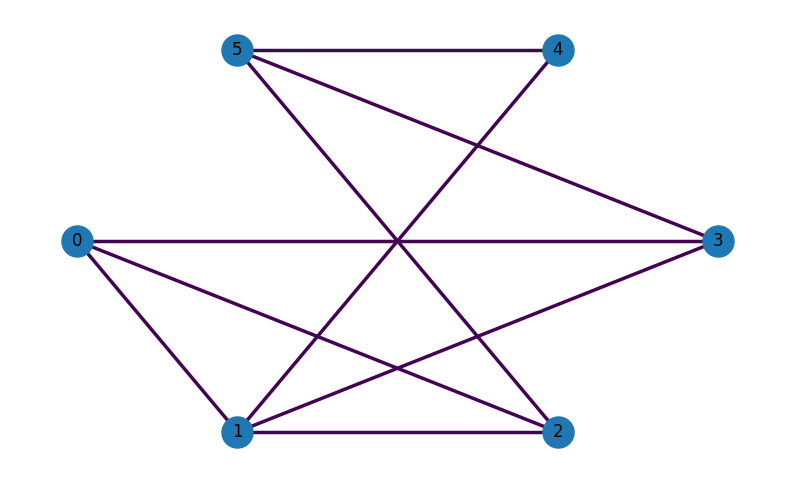

In [267]:
from openqaoa.utilities import plot_graph
plot_graph(G)